In [5]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils, to_categorical
from keras.datasets import mnist
from keras import backend as K

In [7]:
%matplotlib inline
np.random.seed(411)

In [8]:
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [9]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [10]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

Text(0.5,1,'Ground Truth : 2')

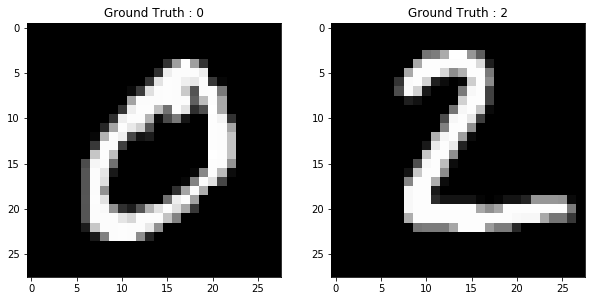

In [14]:
plt.figure(figsize=[10,5])
 
# display the first image in training data
plt.subplot(121)
plt.imshow(X_train[1,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(y_train[1]))
 
# display the first image in testing data
plt.subplot(122)
plt.imshow(X_test[1,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(y_test[1]))

In [15]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

In [16]:
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [17]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [18]:
X_train /= 255 # for gray scale image
X_test /= 255

In [19]:
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples') # 6000 for each images
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [20]:
# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

## Build Model

In [21]:
# change from matrix to array of dimension 28x28 to array of dimention 784
dim_data = np.prod(X_train.shape[1:])
train_data = X_train.reshape(X_train.shape[0], dim_data)
test_data = X_test.reshape(X_test.shape[0], dim_data)

In [22]:
model_nn = Sequential()

In [23]:
model_nn.add(Dense(512, activation='relu', input_shape=(dim_data,)))
model_nn.add(Dropout(0.5))
model_nn.add(Dense(512, activation='relu'))
model_nn.add(Dropout(0.5))
model_nn.add(Dense(num_classes, activation='softmax'))

In [24]:
model_nn.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [25]:
model_nn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [26]:
train_data.shape, y_train.shape

((60000, 784), (60000, 10))

In [27]:
test_data.shape, y_test.shape

((10000, 784), (10000, 10))

In [28]:
history_nn = model_nn.fit(train_data, y_train, batch_size=256, epochs=20, verbose=True, 
                    validation_data=(test_data, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 134us/step - loss: 0.3999 - acc: 0.8762 - val_loss: 0.1410 - val_acc: 0.9554
Epoch 2/20
60000/60000 [==============================] - 9s 143us/step - loss: 0.1729 - acc: 0.9477 - val_loss: 0.0986 - val_acc: 0.9698
Epoch 3/20
60000/60000 [==============================] - 8s 132us/step - loss: 0.1325 - acc: 0.9604 - val_loss: 0.0843 - val_acc: 0.9740
Epoch 4/20
60000/60000 [==============================] - 8s 132us/step - loss: 0.1118 - acc: 0.9661 - val_loss: 0.0724 - val_acc: 0.9782
Epoch 5/20
60000/60000 [==============================] - 8s 128us/step - loss: 0.0963 - acc: 0.9702 - val_loss: 0.0699 - val_acc: 0.9785
Epoch 6/20
60000/60000 [==============================] - 8s 126us/step - loss: 0.0831 - acc: 0.9741 - val_loss: 0.0654 - val_acc: 0.9800
Epoch 7/20
60000/60000 [==============================] - 8s 127us/step - loss: 0.0777 - acc: 0.9754 - val_loss: 0.0619 - 

In [29]:
score = model_nn.evaluate(test_data, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 88us/step
Test loss: 0.0607509319970557
Test accuracy: 0.9837


Text(0.5,1,'Loss Curves')

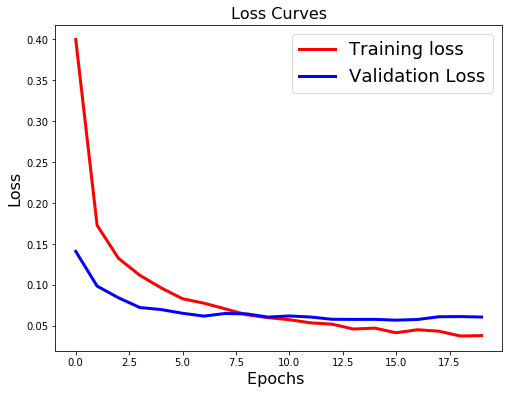

In [30]:
# plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history_nn.history['loss'],'r',linewidth=3.0)
plt.plot(history_nn.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5,1,'Accuracy Curves')

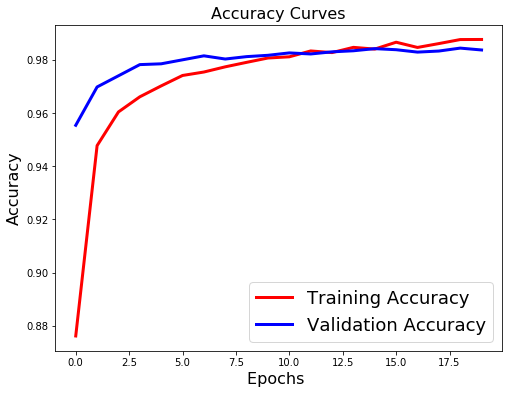

In [31]:
# plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history_nn.history['acc'],'r',linewidth=3.0)
plt.plot(history_nn.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [ ]:
model_nn.predict()